In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

sys.path.append("../model")
sys.path.append("../control")
from networks import *
from analysis_util import *
%load_ext autoreload
%autoreload 2

## Non-Linear Pendulum

In [10]:
model_names = ["d-latent-exp-1", "d-latent-exp-2", "d-latent-exp-3", "d-latent-exp-4"]
model_labels = [r"$N=20$", r"$N=50$", r"$N=100$", r"$N=200$"]
PATH = "../saved/logs/models/denis-latent-exp/pendulum"
x_true = np.load('../data/raw_data/affine/pend_val.npy')

models, model_configs = load_models([DENIS]*4, PATH, model_names)

In [11]:
model_configs

[{'network': 'denis',
  'mode': 'floyd',
  'train_data': '/data/raw_data/pend_train.npy',
  'val_data': '/data/raw_data/pend_val.npy',
  'enc_shape': [2, 5, 10, 10, 20],
  'aux_shape': [2, 5, 10, 10, 22],
  'n_shifts': 51,
  'use_rbf': False,
  'kernel': 'None',
  'aux_rbf': False,
  'drop_prob': 0.0,
  'dt': 0.1,
  'state_loss': 1.0,
  'latent_loss': 1.0,
  'zero_loss': 1.0,
  'reg_loss': 1e-07,
  'inf_loss': 0.0001,
  'lr': 0.0005,
  'lr_sch_step': 50,
  'lr_sch_gamma': 0.5,
  'description': 'Does increasing latent dimension alone help? N=20'},
 {'network': 'denis',
  'mode': 'floyd',
  'train_data': '/data/raw_data/pend_train.npy',
  'val_data': '/data/raw_data/pend_val.npy',
  'enc_shape': [2, 10, 25, 25, 50],
  'aux_shape': [2, 10, 25, 25, 52],
  'n_shifts': 51,
  'use_rbf': False,
  'kernel': 'None',
  'aux_rbf': False,
  'drop_prob': 0.0,
  'dt': 0.1,
  'state_loss': 1.0,
  'latent_loss': 1.0,
  'zero_loss': 1.0,
  'reg_loss': 1e-07,
  'inf_loss': 0.0001,
  'lr': 0.0005,
  'lr_s

100%|██████████| 4/4 [00:58<00:00, 14.53s/it]


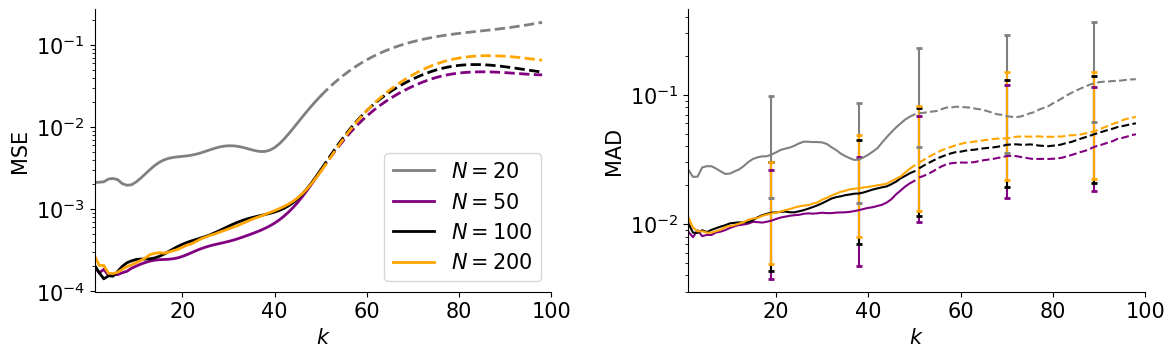

In [5]:
n_shifts = model_configs[0]['n_shifts']
t_end = 100
results = plot_mse_mad(models, model_labels, x_true, n_shifts, t_end)

$N=20$


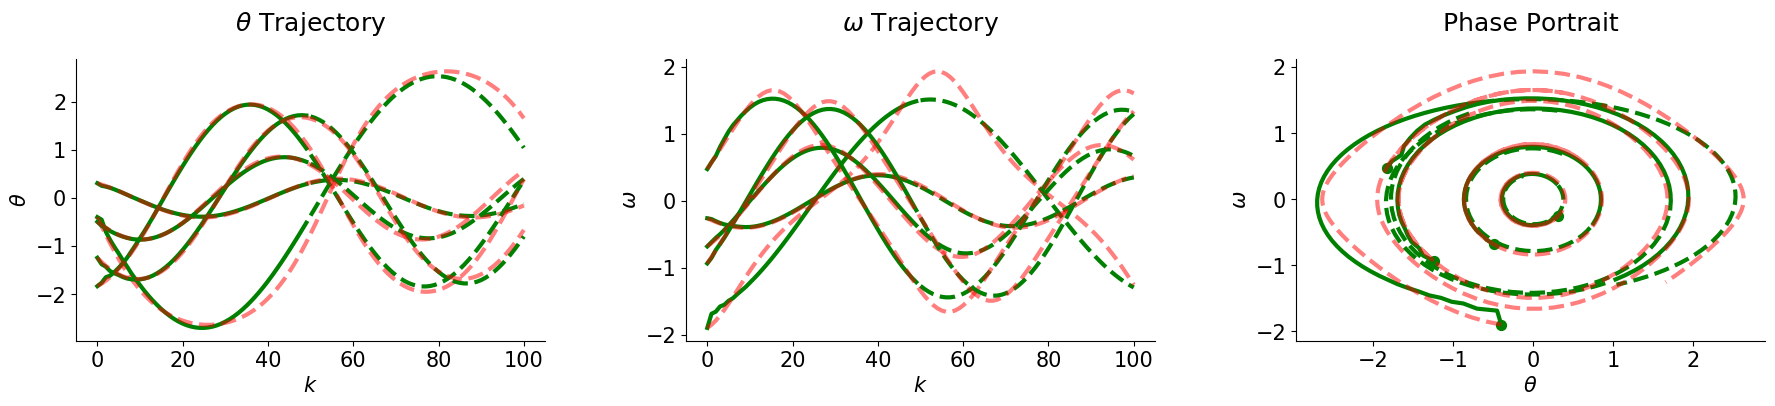

$N=50$


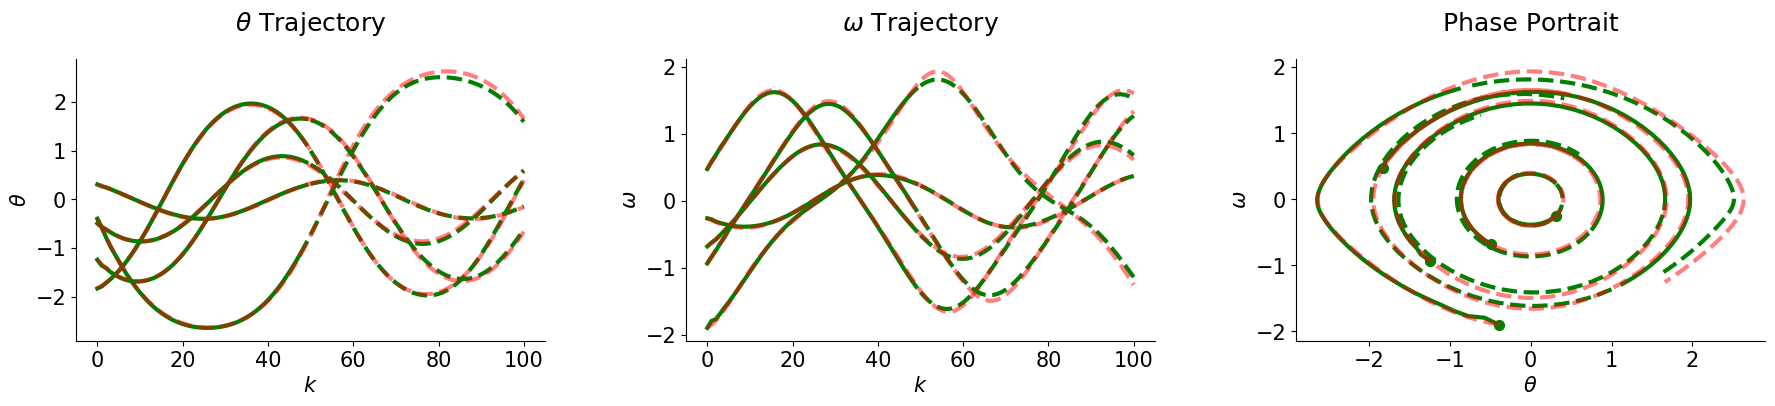

$N=100$


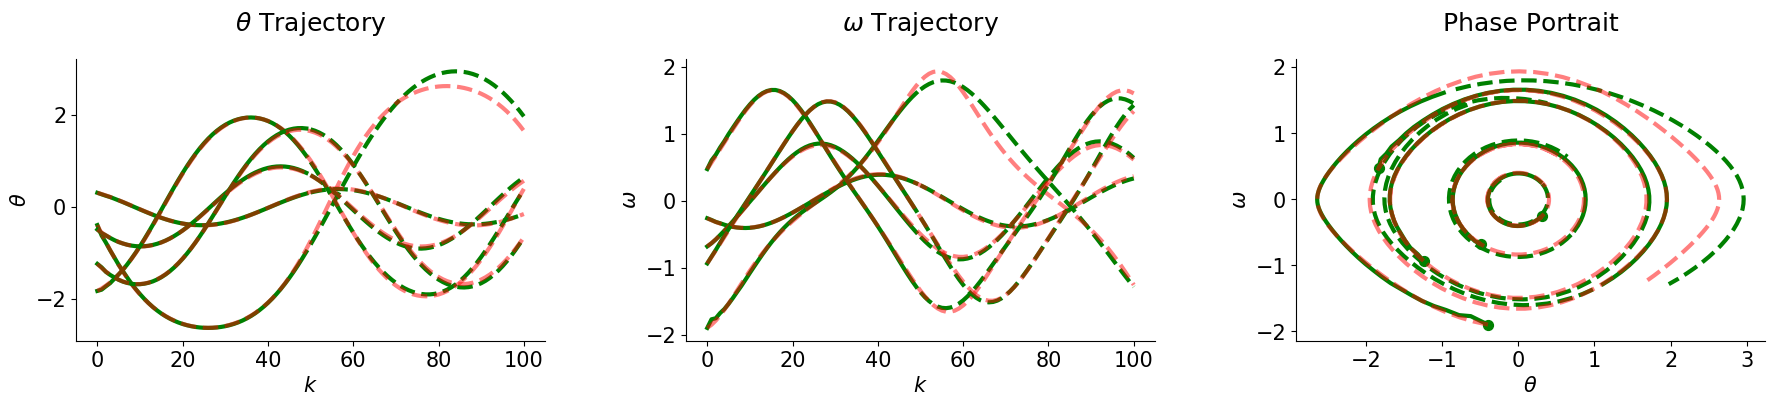

$N=200$


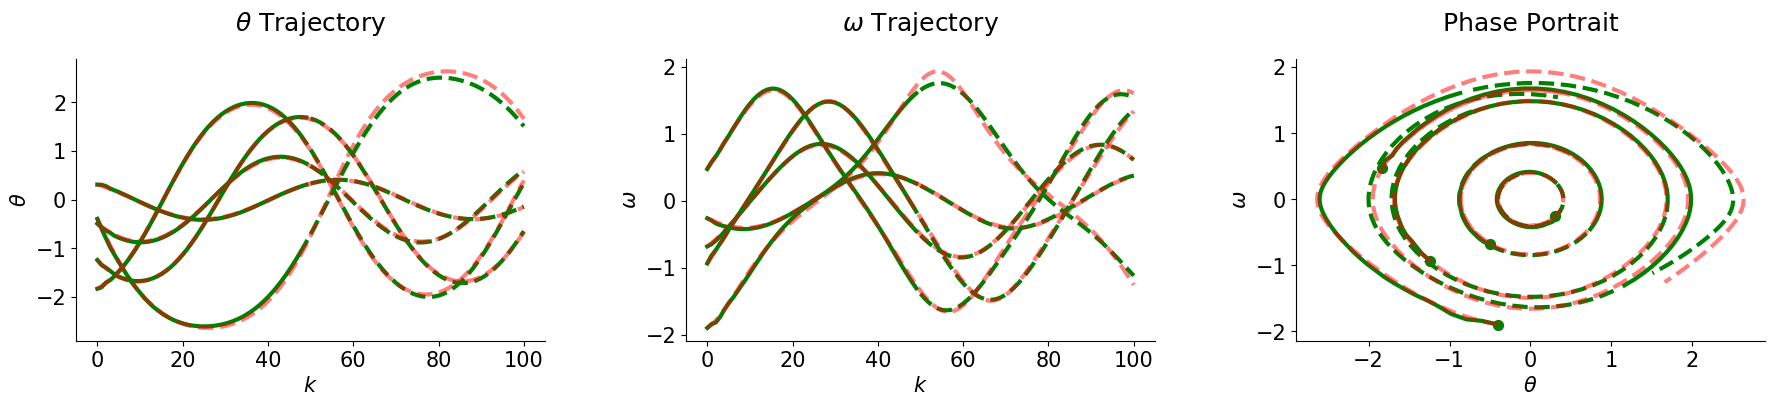

In [16]:
for i in range(4):
    print(model_labels[i])
    _ = plot_trajectories(models[i], 50, x_true)

## Duffing Oscillator

In [8]:
model_names = ["d-latent-exp-1", "d-latent-exp-2", "d-latent-exp-3", "d-latent-exp-4"]
model_labels = [r"$N=20$", r"$N=50$", r"$N=100$", r"$N=200$"]
PATH = "../saved/logs/models/denis-latent-exp/duffing"
x_true = np.load('../data/raw_data/affine/duffing_val.npy')

models, model_configs = load_models([DENIS]*4, PATH, model_names)

100%|██████████| 4/4 [00:49<00:00, 12.36s/it]


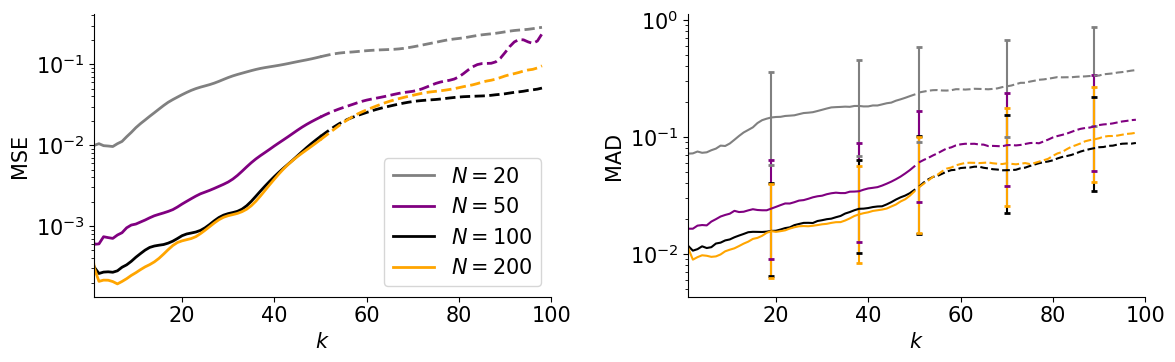

In [9]:
n_shifts = model_configs[0]['n_shifts']
t_end = 100
results = plot_mse_mad(models, model_labels, x_true, n_shifts, t_end)

$N=20$


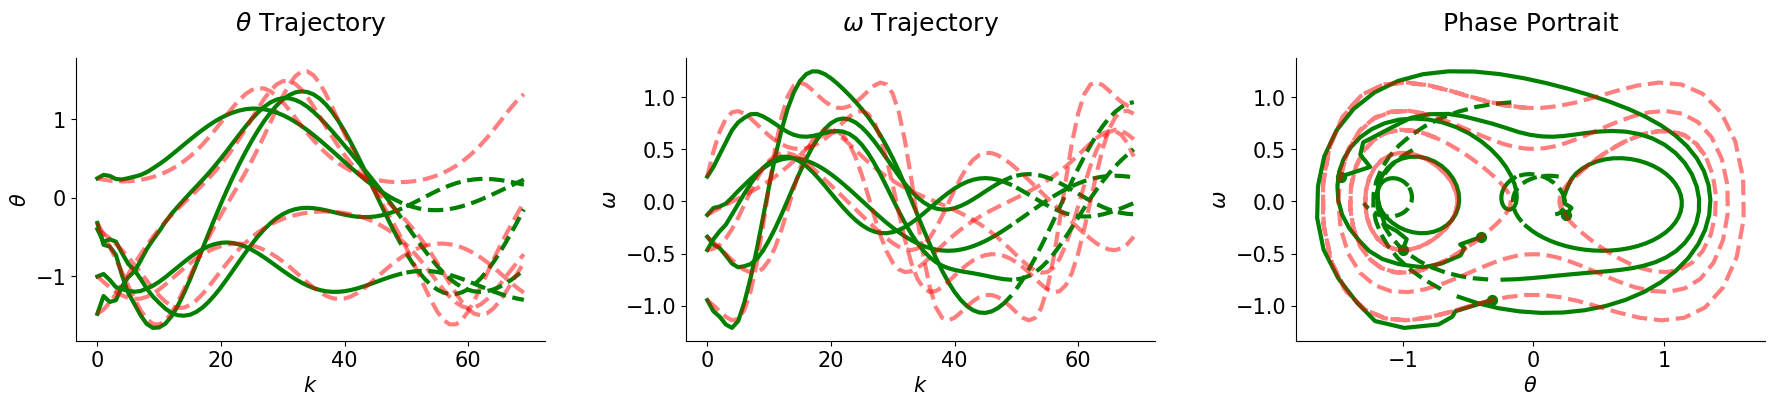

$N=50$


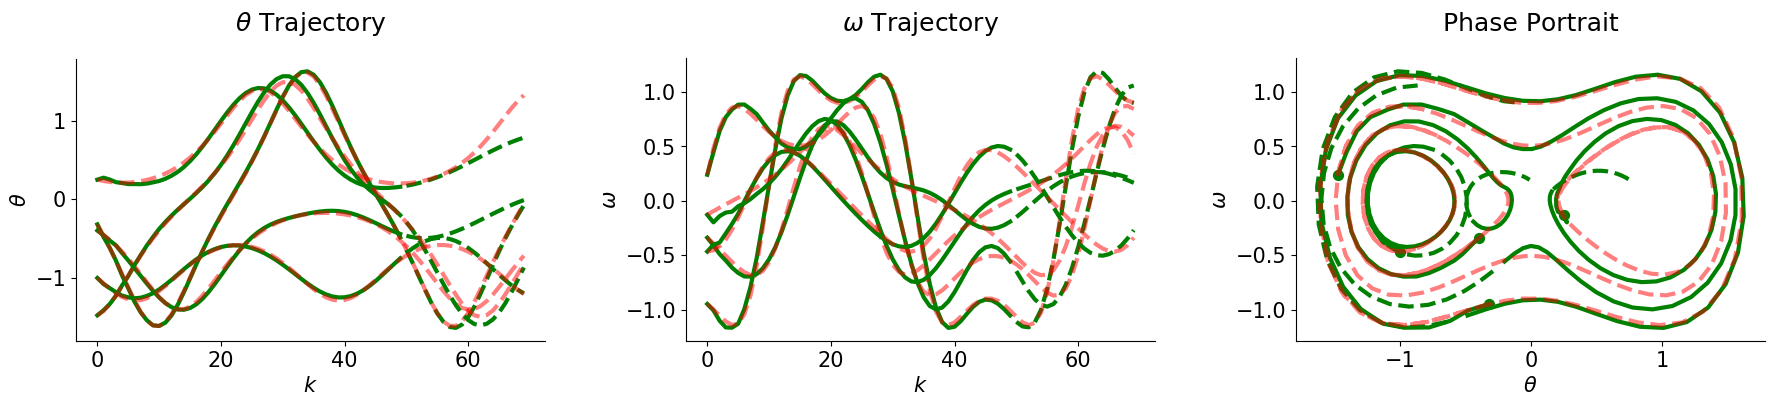

$N=100$


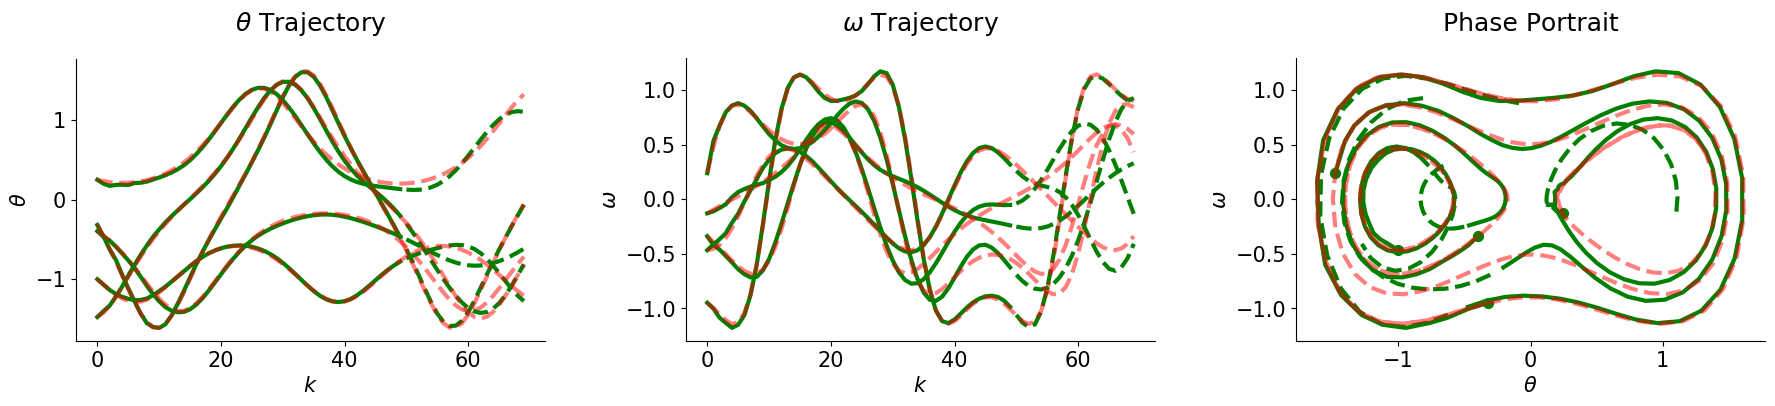

$N=200$


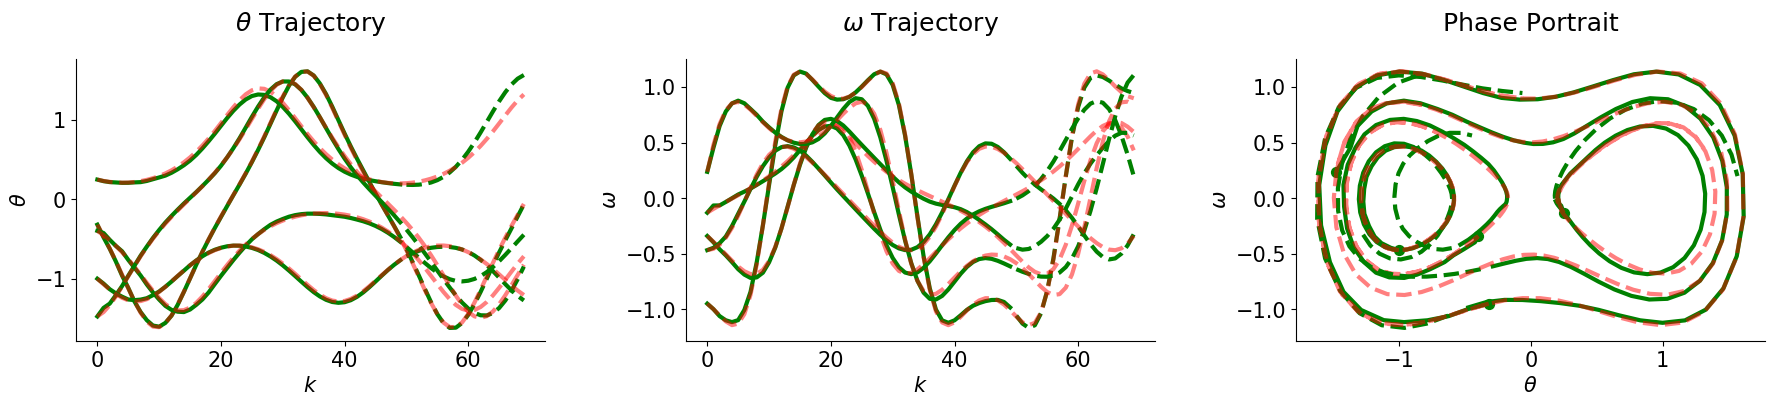

In [9]:
for i in range(4):
    print(model_labels[i])
    _ = plot_trajectories(models[i], 50, x_true[:, :70, :])